In [91]:
import pandas as pd
import numpy as np


In [92]:
df=pd.read_csv("DATASET.csv")

In [93]:
df.dtypes

,0
mileage,int64
price,int64
model_year,int64
make,object
model,object
series,object
style,object
certified,int64
price_analysis,int64
drivetrain_from_vin,object


In [94]:
df_copy=df.copy()

In [95]:
# Check for missing values in different forms
# Define special_missing_values first!
special_missing_values = ['N/A', '?', '-']  # Replace with your actual special missing values

missing_summary = pd.DataFrame({
    "NaN Count": df_copy.isnull().sum(),
    "Zero Count": (df_copy == 0).sum(),
    "Empty String Count": (df_copy == "").sum(),
    "Special Missing Count": df_copy.isin(special_missing_values).sum()
})

# Display the missing value summary
print(missing_summary)

                       NaN Count  Zero Count  Empty String Count  \
mileage                        0       10175                   0   
price                          0        4340                   0   
model_year                     0           0                   0   
make                           0           0                   0   
model                          0           0                   0   
series                       825           0                   0   
style                          0           0                   0   
certified                      0      144156                   0   
price_analysis                 0      133080                   0   
drivetrain_from_vin            0           0                   0   
engine_from_vin                0           0                   0   
transmission_from_vin          0           0                   0   
fuel_type_from_vin             0           0                   0   
number_price_changes           0       59921    

In [96]:
# Get the count of unique values for each column
unique_counts = df_copy.nunique()

# Display the counts of unique values for each column
print(unique_counts)

mileage                  46874
price                    39651
model_year                  38
make                        45
model                      702
series                    1630
style                      664
certified                    2
price_analysis               2
drivetrain_from_vin          4
engine_from_vin            974
transmission_from_vin        4
fuel_type_from_vin           7
number_price_changes       120
stock_type                   2
dtype: int64


In [97]:
df_copy.drop('series', axis=1, inplace=True)


In [98]:
df

,mileage,price,model_year,make,model,series,style,certified,price_analysis,drivetrain_from_vin,engine_from_vin,transmission_from_vin,fuel_type_from_vin,number_price_changes,stock_type
0,230860,11500,1987,Chevrolet,Camaro,Iroc Z28,2D Coupe,0,0,RWD,5.7L V8 TBI,A,Gas,0,USED
1,48905,8700,1988,Chrysler,Fifth Avenue,NaN,4D Sedan,0,0,RWD,5.2L V8,A,Gas,0,USED
2,174640,6000,1989,Cadillac,DeVille,NaN,4D Sedan,0,0,FWD,4.5L V8 DI,A,Gas,0,USED
3,174640,6000,1989,Cadillac,DeVille,NaN,4D Sedan,0,0,FWD,4.5L V8 DI,A,Gas,4,USED
4,288000,8500,1989,Chevrolet,Camaro,Z28,2D Coupe,0,0,RWD,5.7L V8 TBI,A,Gas,0,USED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145109,30,105781,2024,Volvo,XC90,Recharge Ultimate,4D Utility AWD,0,0,AWD,2.0L I-4 DI PHEV T/C,A,PHEV,25,NEW
145110,30,105990,2024,Volvo,XC90,Recharge Ultimate,4D Utility AWD,0,0,AWD,2.0L I-4 DI PHEV T/C,A,PHEV,22,NEW
145111,2454,108201,2024,Volvo,XC90,Recharge Ultimate,4D Utility AWD,0,0,AWD,2.0L I-4 DI PHEV T/C,A,PHEV,2,USED
145112,2454,108201,2024,Volvo,XC90,Recharge Ultimate,4D Utility AWD,0,0,AWD,2.0L I-4 DI PHEV T/C,A,PHEV,10,NEW


In [99]:
# Count the number of vehicles with 0 mileage grouped by stock_type (New/Used)
zero_mileage_counts = df_copy[df_copy["mileage"] == 0]["stock_type"].value_counts()

# Display the result
zero_mileage_counts

,count
stock_type,
NEW,10147
USED,28


In [100]:
# Step 1: Replace 'NEW' with 0
df_copy['mileage'] = df_copy['mileage'].replace('New', 0)

# Step 2: Replace 'USED' with the median mileage
median_mileage = df_copy[df_copy['mileage'] > 0]['mileage'].median()  # Calculate the median of used vehicles
df_copy.loc[(df_copy['stock_type'] == 'USED') & (df_copy['mileage'] == 0), 'mileage'] = median_mileage




In [101]:
df_copy

,mileage,price,model_year,make,model,style,certified,price_analysis,drivetrain_from_vin,engine_from_vin,transmission_from_vin,fuel_type_from_vin,number_price_changes,stock_type
0,230860,11500,1987,Chevrolet,Camaro,2D Coupe,0,0,RWD,5.7L V8 TBI,A,Gas,0,USED
1,48905,8700,1988,Chrysler,Fifth Avenue,4D Sedan,0,0,RWD,5.2L V8,A,Gas,0,USED
2,174640,6000,1989,Cadillac,DeVille,4D Sedan,0,0,FWD,4.5L V8 DI,A,Gas,0,USED
3,174640,6000,1989,Cadillac,DeVille,4D Sedan,0,0,FWD,4.5L V8 DI,A,Gas,4,USED
4,288000,8500,1989,Chevrolet,Camaro,2D Coupe,0,0,RWD,5.7L V8 TBI,A,Gas,0,USED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145109,30,105781,2024,Volvo,XC90,4D Utility AWD,0,0,AWD,2.0L I-4 DI PHEV T/C,A,PHEV,25,NEW
145110,30,105990,2024,Volvo,XC90,4D Utility AWD,0,0,AWD,2.0L I-4 DI PHEV T/C,A,PHEV,22,NEW
145111,2454,108201,2024,Volvo,XC90,4D Utility AWD,0,0,AWD,2.0L I-4 DI PHEV T/C,A,PHEV,2,USED
145112,2454,108201,2024,Volvo,XC90,4D Utility AWD,0,0,AWD,2.0L I-4 DI PHEV T/C,A,PHEV,10,NEW


In [102]:

# Check the number of missing values in the mileage column
missing_values = df_copy['mileage'].isnull().sum()
print(f"Missing values in 'mileage' column: {missing_values}")


Missing values in 'mileage' column: 0


In [103]:
df_copy['transmission_from_vin'].value_counts()

,count
transmission_from_vin,
A,141105
M,3975
7,32
6,2


In [104]:
df_copy['transmission_from_vin'] = df_copy['transmission_from_vin'].replace({'7': 'A', '6': 'M'})
print(df_copy['transmission_from_vin'].unique())

['A' 'M']


In [105]:
from sklearn.impute import KNNImputer

# Replace zeros with NaN
df_copy['price'] = df_copy['price'].replace(0, np.nan)

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_copy['price'] = imputer.fit_transform(df_copy[['price', 'mileage', 'model_year']])[:, 0]

# Check the number of missing values in the price column
missing_values = df_copy['price'].isnull().sum()
print(f"Missing values in 'price' column: {missing_values}")

Missing values in 'price' column: 0


In [106]:
# Get unique values for the "Certified" and "Price Analysis" columns
df_copy['price_analysis'].value_counts()

,count
price_analysis,
0,133080
1,12034


In [107]:
df_copy['certified'].value_counts()

,count
certified,
0,144156
1,958


In [108]:
# Ensure the column is treated as a string, then extract only numeric engine displacement
df_copy['engine_from_vin'] = df_copy['engine_from_vin'].astype(str).str.extract(r'(\d+\.\d+)')


In [109]:
# Replace zeros with NaN
df_copy['engine_from_vin'] = df_copy['engine_from_vin'].replace(0, np.nan)

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_copy['engine_from_vin'] = imputer.fit_transform(df_copy[['engine_from_vin', 'mileage', 'model_year']])[:, 0]

# Check the number of missing values in the price column
missing_values = df_copy['engine_from_vin'].isnull().sum()
print(f"Missing values in 'engine_from_vin' column: {missing_values}")

Missing values in 'engine_from_vin' column: 0


In [110]:
df_copy.isnull().sum() + (df == 0).sum()

,0
certified,144156.0
drivetrain_from_vin,0.0
engine_from_vin,0.0
fuel_type_from_vin,0.0
make,0.0
mileage,10175.0
model,0.0
model_year,0.0
number_price_changes,59921.0
price,4340.0


In [111]:
df_clean_dulpicated_sum = {f"The number of duplicated rows are: {df_copy.duplicated().sum()}"}  # Replace df_clean with df_copy
print(df_clean_dulpicated_sum)

{'The number of duplicated rows are: 28201'}


In [114]:
df_copy.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
145109,False
145110,False
145111,False
145112,False


In [115]:
df_copy.shape

(145114, 14)

In [116]:
df_copy.drop_duplicates(inplace=True)

In [117]:
df_copy.shape

(116913, 14)

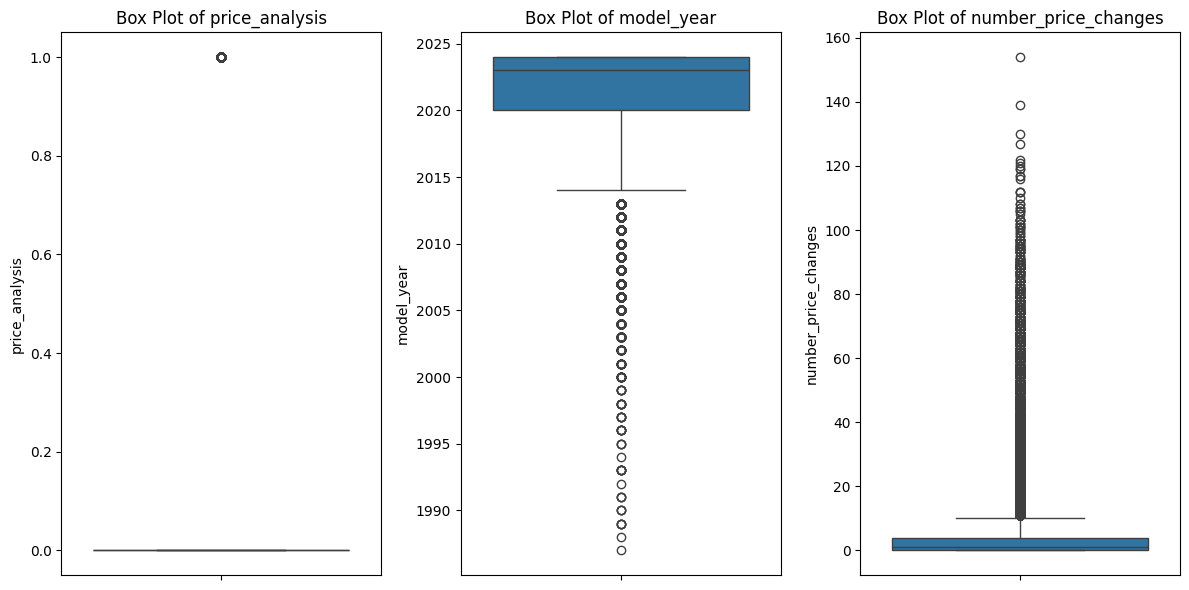

In [118]:
# Columns to check for outliers
import seaborn as sns
import matplotlib.pyplot as plt
columns_to_check = ['price_analysis', 'model_year', 'number_price_changes']

# Create box plots
plt.figure(figsize=(12, 6))

for i, col in enumerate(columns_to_check, 1):
    plt.subplot(1, len(columns_to_check), i)
    sns.boxplot(y=df_copy[col])
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

In [119]:
# Columns to check for outliers
columns_to_check = ['price_analysis', 'model_year', 'number_price_changes']

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return outliers

# Apply IQR method and print outliers for each column
for col in columns_to_check:
    outliers = detect_outliers_iqr(df_copy, col)
    print(f"Outliers in {col}:")
    print(outliers)
    print("\n")

Outliers in price_analysis:
        mileage    price  model_year       make       model           style  \
6         21364  29900.0        1990      Dodge     Ram 150        Club Cab   
26       533380    995.0        1995        GMC     C/K1500     Ext Cab 4WD   
28        48654  28000.0        1996  Chevrolet     C/K3500    Crew Cab 4WD   
36       395698   3609.0        1997       Ford    Explorer  4D Utility 4WD   
39       231123   1988.0        1998  Chevrolet  Astro Vans       Ext Wagon   
...         ...      ...         ...        ...         ...             ...   
140547        0  55534.0        2024     Toyota       Venza  4D Utility AWD   
140548        5  56100.0        2024     Toyota       Venza  4D Utility AWD   
140553        0  45579.0        2024     Toyota       Venza  4D Utility AWD   
140559        0  51075.0        2024     Toyota       Venza  4D Utility AWD   
140564        0  57535.0        2024     Toyota       Venza  4D Utility AWD   

        certified  pric

Price Analysis Outliers:
Some cars have extremely high or low prices, which may indicate rare models or errors.
Older cars tend to have lower prices, while newer ones have very high prices.
Used cars generally show more variation in pricing than new ones.


Model Year Outliers:
Very old cars (1980s-90s) and brand-new cars (2024) stand out in the data.
Older cars might be rare collectibles or heavily used, affecting their value.
Newer cars have high prices, likely due to demand and dealership pricing.


Number of Price Changes Outliers:
Some cars have had too many price changes, which might indicate demand fluctuations.
Frequent price changes could be due to dealership strategies or incorrect data.
Cars with very few or no price changes are likely stable in demand or pricing.
